In [78]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn
plt.rcParams['figure.figsize'] = 12, 12

In [79]:
data = pd.read_csv('./credit_card_default.csv')

target = data['default_pay']
train = data.copy().drop(['default_pay','ID'], axis=1)

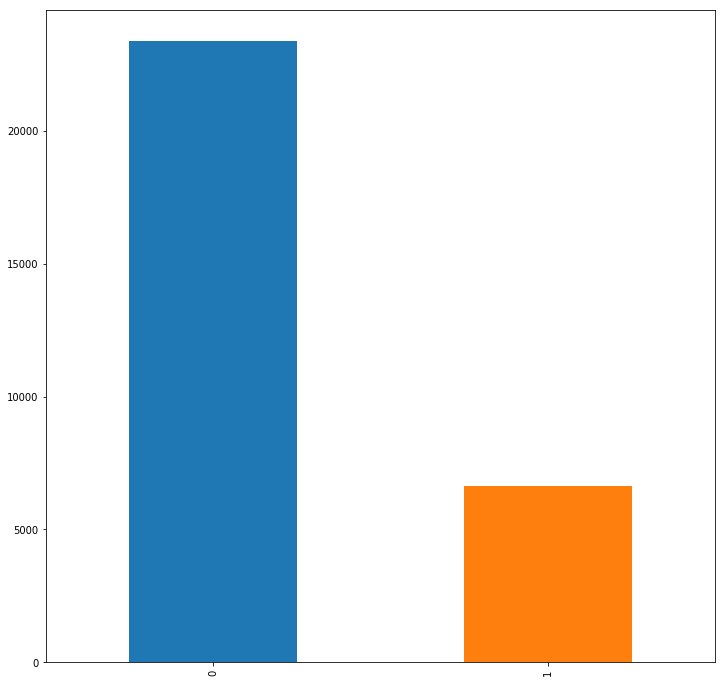

In [80]:
target.value_counts().plot(kind='bar')

In [81]:
train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

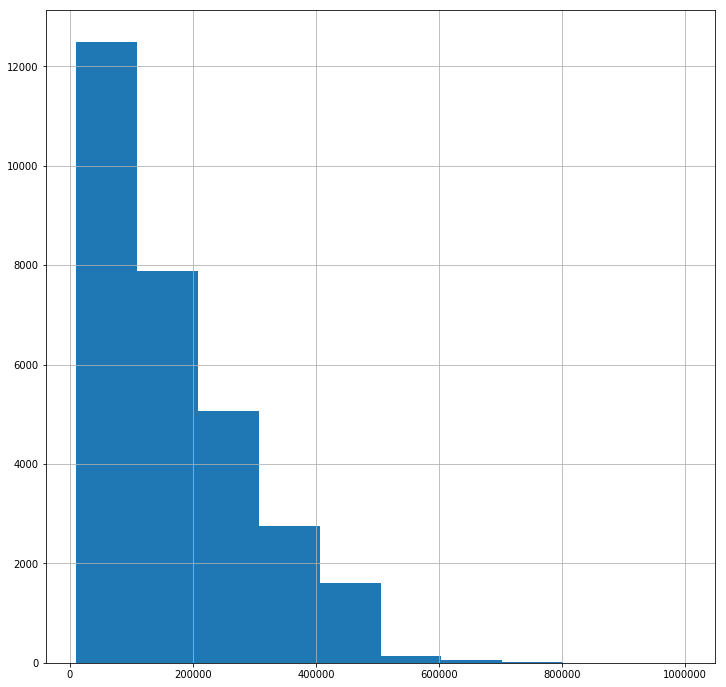

In [82]:
train['LIMIT_BAL'].hist()

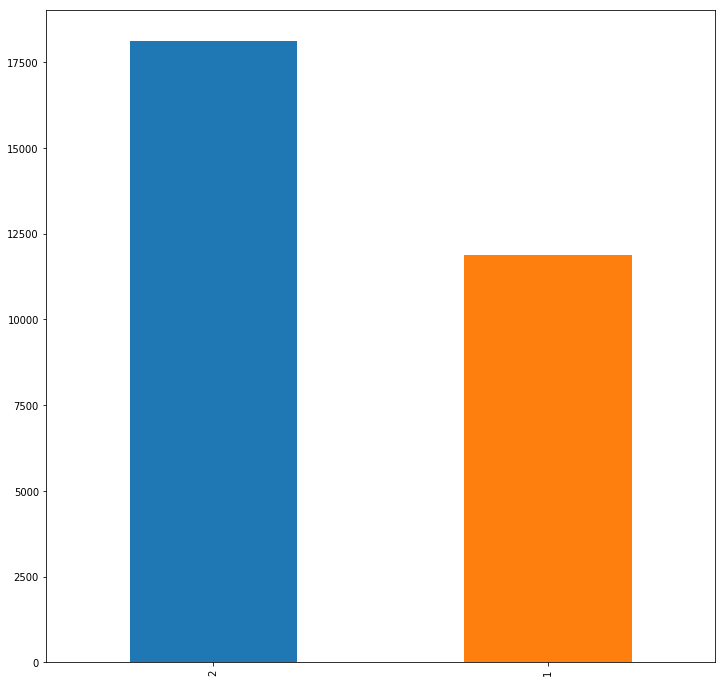

In [83]:
train['SEX'].value_counts().plot(kind='bar')

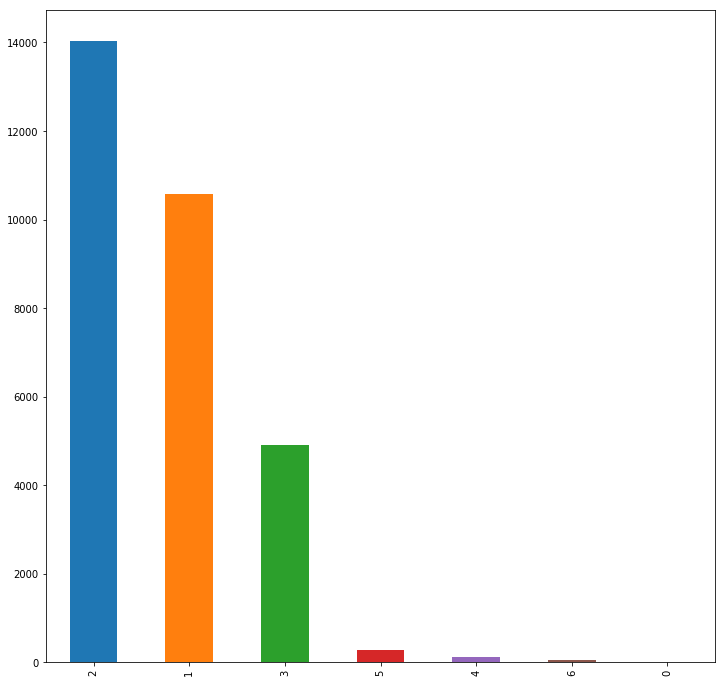

In [84]:
train['EDUCATION'].value_counts().plot(kind='bar')

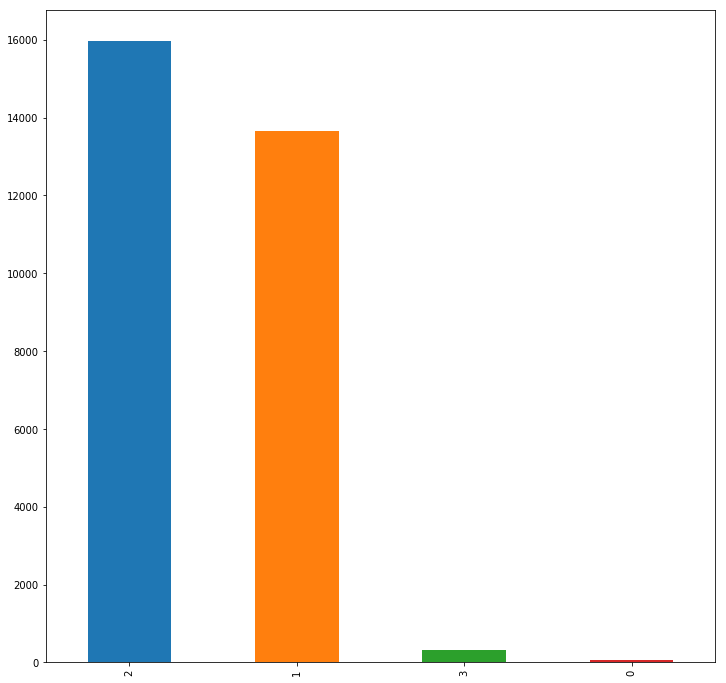

In [85]:
train['MARRIAGE'].value_counts().plot(kind='bar')

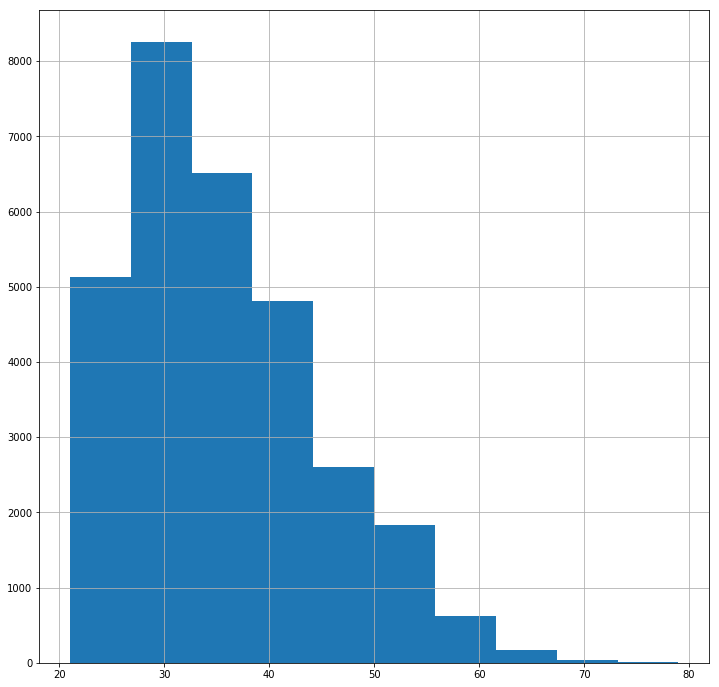

In [86]:
train['AGE'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C29D7A3898>,
      dtype=object)

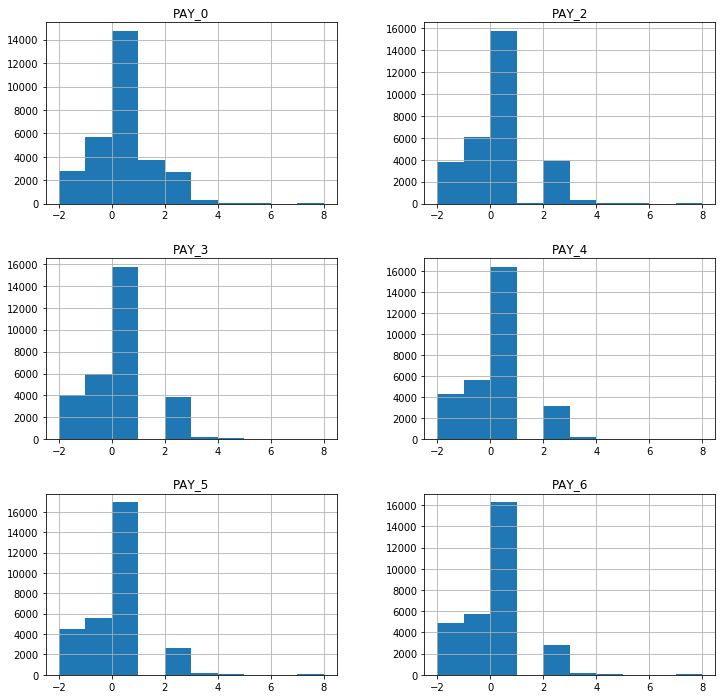

In [87]:
train[['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C2A1090C88>,
      dtype=object)

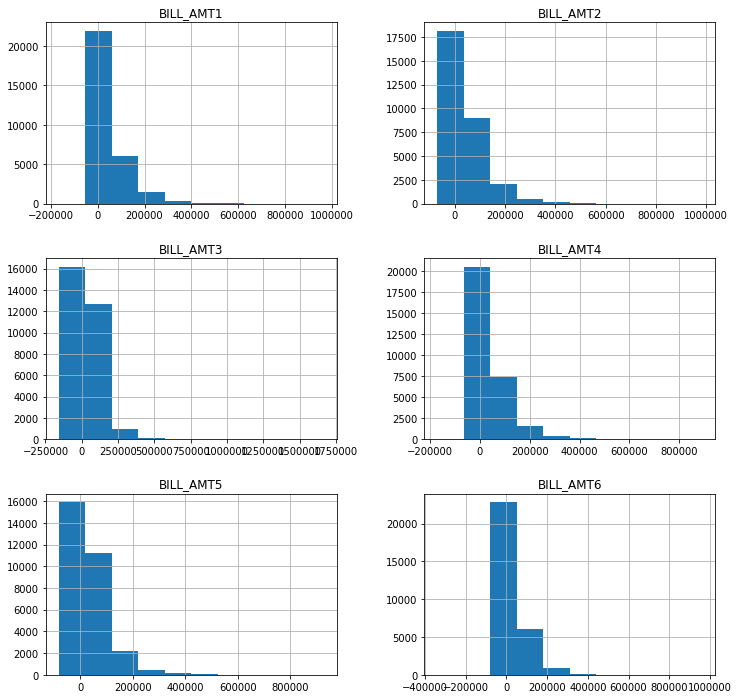

In [88]:
train[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].hist()

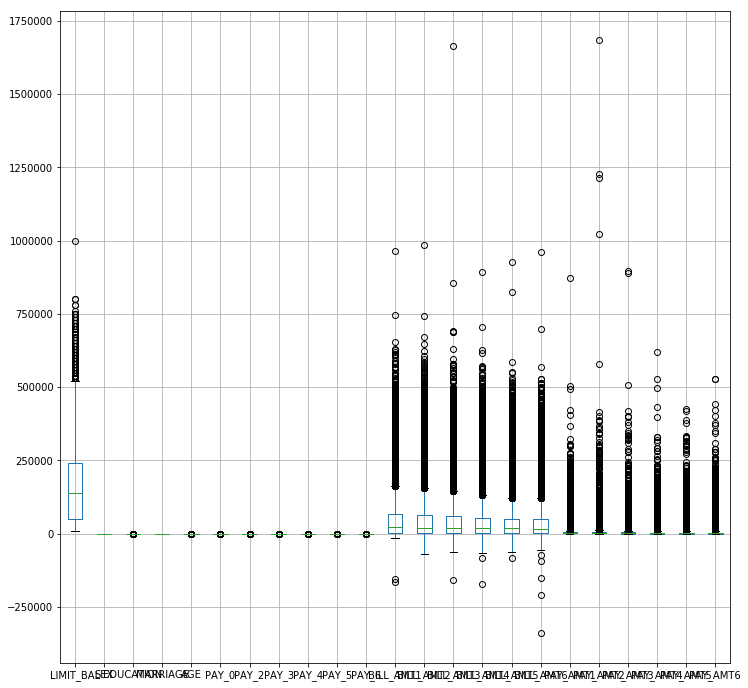

In [89]:
train.boxplot()

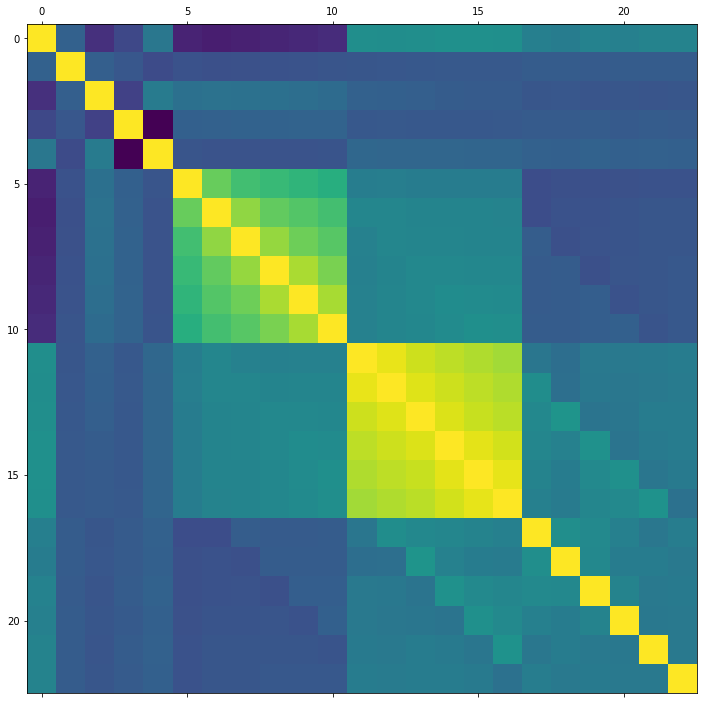

In [90]:
plt.matshow(train.corr())

In [91]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [92]:
tree.fit(train, target)
pd.DataFrame(data=[tree.feature_importances_],columns=train.columns).rename({0: 'importance'}).transpose().sort_values(by="importance",ascending = False)

,importance
PAY_0,0.161405
AGE,0.073598
BILL_AMT1,0.071528
LIMIT_BAL,0.060836
PAY_AMT3,0.055003
PAY_AMT1,0.050494
BILL_AMT6,0.050226
BILL_AMT2,0.048732
PAY_AMT2,0.047403
PAY_AMT6,0.047311


C:\Dev\Anaconda\lib\site-packages\numpy\lib\function_base.py:786: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
C:\Dev\Anaconda\lib\site-packages\numpy\lib\function_base.py:792: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)
C:\Dev\Anaconda\lib\site-packages\matplotlib\transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\Dev\Anaconda\lib\site-packages\matplotlib\transforms.py:2041: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C2A1DFCBE0>,
      dtype=object)

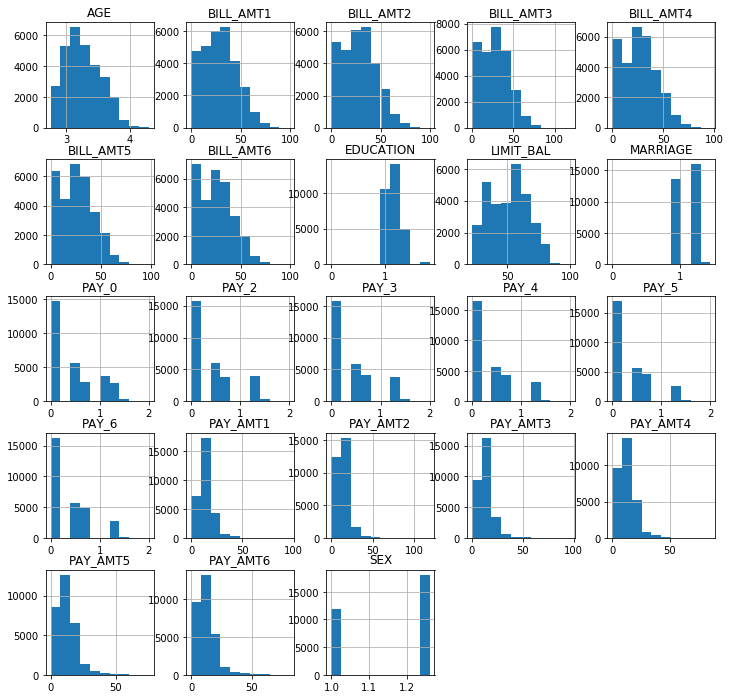

In [93]:
from numbers import Number
train.applymap(lambda x: x ** (1. / 3) if isinstance(x, Number) else x ).hist()

C:\Dev\Anaconda\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


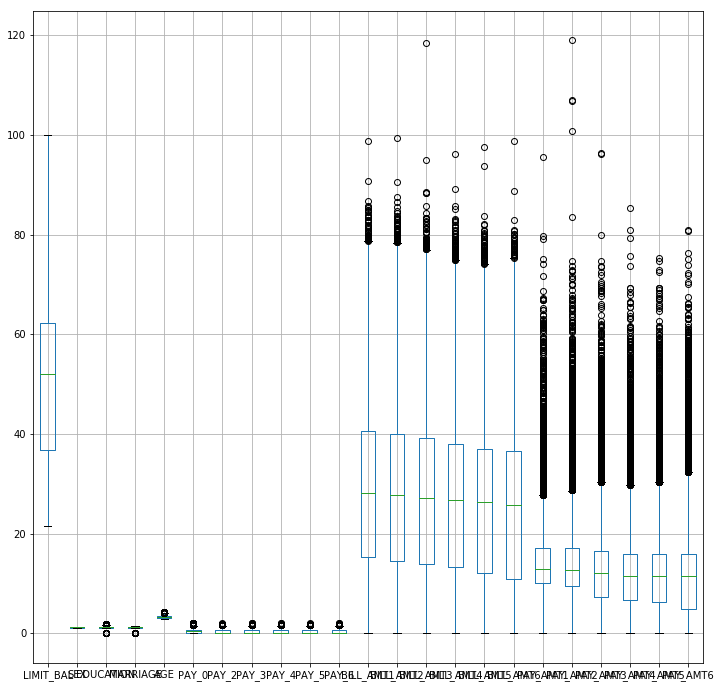

In [94]:
train.applymap(lambda x: x ** (1. / 3) if isinstance(x, Number) else x ).boxplot()